In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.3MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data.batting_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data.bowling_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [11]:
data2.team1.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.team2.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [12]:
data2.toss_winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [13]:
data.batting_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data.bowling_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [14]:
data2.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [15]:
data2.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [16]:
data_f = data2.loc[data2.team1.isin(['Delhi Capitals','Royal Challengers Bangalore'])] 
data_f = data_f.loc[data_f.team2.isin(['Delhi Capitals','Royal Challengers Bangalore'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
54,55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,10,0,HV Patel,Feroz Shah Kotla,CK Nandan,C Shamshuddin,NaN
75,76,2008,Delhi,2008-04-30,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Capitals,10,0,GD McGrath,Feroz Shah Kotla,Aleem Dar,I Shivram,NaN
103,104,2008,Bangalore,2008-05-19,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,SP Goswami,M Chinnaswamy Stadium,SJ Davis,GA Pratapkumar,NaN
128,129,2009,Port Elizabeth,2009-04-26,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Delhi Capitals,0,6,TM Dilshan,St George's Park,S Asnani,BG Jerling,NaN
166,167,2009,Johannesburg,2009-05-19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Royal Challengers Bangalore,0,7,JH Kallis,New Wanderers Stadium,IL Howell,RB Tiffin,NaN
196,197,2010,Bangalore,2010-03-25,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Capitals,17,0,KM Jadhav,M Chinnaswamy Stadium,BG Jerling,RE Koertzen,NaN
208,209,2010,Delhi,2010-04-04,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,37,0,PD Collingwood,Feroz Shah Kotla,BF Bowden,M Erasmus,NaN
262,263,2011,Delhi,2011-04-26,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,3,V Kohli,Feroz Shah Kotla,S Asnani,RJ Tucker,NaN
311,312,2012,Bangalore,2012-04-07,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Royal Challengers Bangalore,20,0,AB de Villiers,M Chinnaswamy Stadium,S Asnani,S Ravi,NaN


**Let's do Q1 now**

RCB Wins - 14
DC Wins - 8


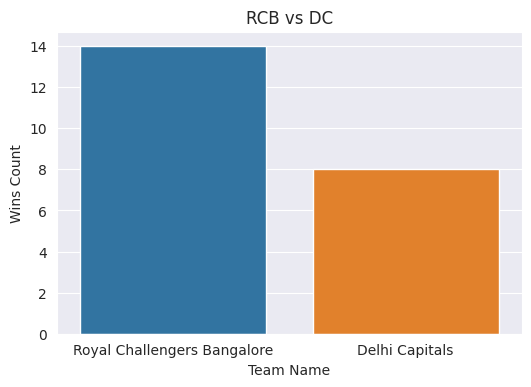

In [18]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('RCB vs DC')
A,B =data_f.winner.value_counts()

print('RCB Wins -',A)
print('DC Wins -',B)

plt.show()


Well RCB has advantage here.

**Let's do Q2 now**

**Let's find batsman with strike rate > 130**

In [20]:
data_n = data.loc[data.bowling_team.isin(['Delhi Capitals','Royal Challengers Bangalore'])]
data_n = data_n.loc[data.batting_team.isin(['Delhi Capitals','Royal Challengers Bangalore'])]

In [21]:
data_sr = data_n.groupby(['match_id','batsman']).apply(lambda data_n:(data_n.batsman_runs.sum())).reset_index(name='Runs_Scored')
data_sr

,match_id,batsman,Runs_Scored
0,5,A Mishra,8
1,5,AP Tare,18
2,5,CH Gayle,6
3,5,CH Morris,4
4,5,CR Brathwaite,1
...,...,...,...
337,11337,S Dube,24
338,11337,S Rutherford,32
339,11337,SS Iyer,52
340,11337,V Kohli,24


In [22]:
data_sr2 = data_n.groupby(['match_id','batsman']).apply(lambda data_n:(data_n.over.value_counts().sum())).reset_index(name='Balls_Faced')
data_sr2

,match_id,batsman,Balls_Faced
0,5,A Mishra,14
1,5,AP Tare,18
2,5,CH Gayle,9
3,5,CH Morris,5
4,5,CR Brathwaite,5
...,...,...,...
337,11337,S Dube,16
338,11337,S Rutherford,13
339,11337,SS Iyer,37
340,11337,V Kohli,17


In [23]:
data_s = data_sr.join(data_sr2['Balls_Faced'])
data_s

,match_id,batsman,Runs_Scored,Balls_Faced
0,5,A Mishra,8,14
1,5,AP Tare,18,18
2,5,CH Gayle,6,9
3,5,CH Morris,4,5
4,5,CR Brathwaite,1,5
...,...,...,...,...
337,11337,S Dube,24,16
338,11337,S Rutherford,32,13
339,11337,SS Iyer,52,37
340,11337,V Kohli,24,17


In [24]:
data_s['Strike_Rate'] = (data_s['Runs_Scored']/data_s['Balls_Faced']) * 100
data_s

,match_id,batsman,Runs_Scored,Balls_Faced,Strike_Rate
0,5,A Mishra,8,14,57.142857
1,5,AP Tare,18,18,100.000000
2,5,CH Gayle,6,9,66.666667
3,5,CH Morris,4,5,80.000000
4,5,CR Brathwaite,1,5,20.000000
...,...,...,...,...,...
337,11337,S Dube,24,16,150.000000
338,11337,S Rutherford,32,13,246.153846
339,11337,SS Iyer,52,37,140.540541
340,11337,V Kohli,24,17,141.176471


Now, We have a condition of more than 3 boundaries. To score atleast 4 boundaries one needs to score 16 runs.

Let's filter out it with this condition.

In [27]:
data_s = data_s[data_s.Runs_Scored >= 16 ] # Max 16 runs to score 4 boundaries

In [28]:
data_s = data_s[data_s.Strike_Rate > 130 ] # Max Strike Rate of 130 Condition

In [29]:
data_s.head()

,match_id,batsman,Runs_Scored,Balls_Faced,Strike_Rate
7,5,KM Jadhav,69,38,181.578947
11,5,RR Pant,57,39,146.153846
16,5,SW Billings,25,19,131.578947
26,55,Mohammed Shami,21,9,233.333333
29,55,RR Pant,45,34,132.352941


In [30]:
data_s = data_s[data_s.Balls_Faced > 10 ]

In [31]:
data_s.head()

,match_id,batsman,Runs_Scored,Balls_Faced,Strike_Rate
7,5,KM Jadhav,69,38,181.578947
11,5,RR Pant,57,39,146.153846
16,5,SW Billings,25,19,131.578947
29,55,RR Pant,45,34,132.352941
39,76,G Gambhir,86,54,159.259259


In [32]:
data_s.batsman.value_counts().sum()

80

In [33]:
data_s.match_id.nunique()

23

In [34]:
np.round(80/23,2) # Average players to score with SR of 130 and hit more than 3 boundaries with atleast 10 balls faced in DC v RCB contest


3.48

Let's mark 3-4 considering our analysis.

**For Q3, Let's find Rabada's stats v RCB**

In [40]:
data_kr = data.loc[data.batting_team.isin(['Royal Challengers Bangalore'])]
data_kr = data_kr.loc[data_kr.bowler.isin(['K Rabada'])]

In [41]:
data_kr.match_id.nunique()

2

In [42]:
data_krdc = data_kr.groupby(['match_id','over']).apply(lambda data_kr:(data_kr.player_dismissed.value_counts().sum())).reset_index(name='Wickets')
data_krdc

,match_id,over,Wickets
0,11311,6,1
1,11311,8,0
2,11311,18,3
3,11311,20,0
4,11337,4,0
5,11337,6,1
6,11337,18,0
7,11337,20,1


Well Rabada has played two matches v RCB and has took wicket in 1 over and 2 over.

He performs well in 2 spell.

And this season too DC mostly uses only 1 over of him at start and then brought him again.

After considering all let's mark option 2 i.e his second over.

**Let's do Q4 now**

**Let's find economy rate for all**

In [46]:
data_er = data_n.groupby(['match_id','bowler']).apply(lambda data_n:(data_n.total_runs.sum())).reset_index(name='Runs_Given')
data_er

,match_id,bowler,Runs_Given
0,5,A Mishra,32
1,5,B Stanlake,29
2,5,CH Morris,22
3,5,CR Brathwaite,29
4,5,Iqbal Abdulla,36
...,...,...,...
261,11337,S Lamichhane,36
262,11337,S Rutherford,6
263,11337,UT Yadav,40
264,11337,Washington Sundar,31


In [47]:
data_er2 = data_n.groupby(['match_id','bowler']).apply(lambda data_n:(data_n.over.value_counts().sum())).reset_index(name='Balls_bowled')
data_er2

,match_id,bowler,Balls_bowled
0,5,A Mishra,12
1,5,B Stanlake,25
2,5,CH Morris,24
3,5,CR Brathwaite,13
4,5,Iqbal Abdulla,21
...,...,...,...
261,11337,S Lamichhane,18
262,11337,S Rutherford,6
263,11337,UT Yadav,25
264,11337,Washington Sundar,24


In [48]:
data_e = data_er.join(data_er2['Balls_bowled'])
data_e

,match_id,bowler,Runs_Given,Balls_bowled
0,5,A Mishra,32,12
1,5,B Stanlake,29,25
2,5,CH Morris,22,24
3,5,CR Brathwaite,29,13
4,5,Iqbal Abdulla,36,21
...,...,...,...,...
261,11337,S Lamichhane,36,18
262,11337,S Rutherford,6,6
263,11337,UT Yadav,40,25
264,11337,Washington Sundar,31,24


In [54]:
data_e['Overs_Bowled'] = data_e['Balls_bowled'] // 6
data_e

,match_id,bowler,Runs_Given,Balls_bowled,Overs_Bowled
0,5,A Mishra,32,12,2
1,5,B Stanlake,29,25,4
2,5,CH Morris,22,24,4
3,5,CR Brathwaite,29,13,2
4,5,Iqbal Abdulla,36,21,3
...,...,...,...,...,...
261,11337,S Lamichhane,36,18,3
262,11337,S Rutherford,6,6,1
263,11337,UT Yadav,40,25,4
264,11337,Washington Sundar,31,24,4


We have used // because there were some balls more than 24.

Also, there can be some balls less than the complete over.

Let's find Economy rate for both 

In [56]:
data_e['Economy_rate_overs'] =( data_e['Runs_Given'] / data_e['Overs_Bowled'])
data_e

,match_id,bowler,Runs_Given,Balls_bowled,Overs_Bowled,Economy_rate_overs
0,5,A Mishra,32,12,2,16.00
1,5,B Stanlake,29,25,4,7.25
2,5,CH Morris,22,24,4,5.50
3,5,CR Brathwaite,29,13,2,14.50
4,5,Iqbal Abdulla,36,21,3,12.00
...,...,...,...,...,...,...
261,11337,S Lamichhane,36,18,3,12.00
262,11337,S Rutherford,6,6,1,6.00
263,11337,UT Yadav,40,25,4,10.00
264,11337,Washington Sundar,31,24,4,7.75


In [58]:
data_e['Economy_rate_balls'] =( data_e['Runs_Given'] / data_e['Balls_bowled']) * 6
data_e

,match_id,bowler,Runs_Given,Balls_bowled,Overs_Bowled,Economy_rate_overs,Economy_rate_balls
0,5,A Mishra,32,12,2,16.00,16.000000
1,5,B Stanlake,29,25,4,7.25,6.960000
2,5,CH Morris,22,24,4,5.50,5.500000
3,5,CR Brathwaite,29,13,2,14.50,13.384615
4,5,Iqbal Abdulla,36,21,3,12.00,10.285714
...,...,...,...,...,...,...,...
261,11337,S Lamichhane,36,18,3,12.00,12.000000
262,11337,S Rutherford,6,6,1,6.00,6.000000
263,11337,UT Yadav,40,25,4,10.00,9.600000
264,11337,Washington Sundar,31,24,4,7.75,7.750000


In [69]:
data_e = data_e[data_e.Balls_bowled >12] # Max 2 over condition

In [70]:
data_e = data_e[data_e.Overs_Bowled >2] # Max 2 over condition

In [71]:
data_e = data_e[data_e.Economy_rate_overs < 8] # Economy rate should be less than 8

In [72]:
data_e = data_e[data_e.Economy_rate_balls < 8] # Economy rate should be less than 8

In [73]:
data_e.head()

,match_id,bowler,Runs_Given,Balls_bowled,Overs_Bowled,Economy_rate_overs,Economy_rate_balls
1,5,B Stanlake,29,25,4,7.25,6.96
2,5,CH Morris,22,24,4,5.50,5.50
6,5,PJ Cummins,30,25,4,7.50,7.20
7,5,S Nadeem,13,25,4,3.25,3.12
8,5,SR Watson,21,24,4,5.25,5.25


In [74]:
data_e.Economy_rate_overs.value_counts().sum() # No of bowlers with less than economy rate of 8 in DC v RCB contest

93

In [75]:
data_e.Economy_rate_balls.value_counts().sum() # No of bowlers with less than economy rate of 8 in DC v RCB contest

93

Well we haven't got any discrepancy in our data

It's good

In [78]:
np.round(93/23,2) # Average bowler per match with Economy of less than 8

4.04

Let's mark 4-5 considering our analysis.

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

